<a href="https://colab.research.google.com/github/mahalaxmy/Principal-component-analysis/blob/main/PCA_Using_Audi_Car_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression

# matplotlib defaults

plt.style.use("seaborn-darkgrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-1-7f999182bd13>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [2]:
audi= pd.read_csv('audi.csv')
audi

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [3]:
# variance among numircal features
audi.var()

<ipython-input-3-d84bccef6b80>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  audi.var()


year          4.698029e+00
price         1.372375e+08
mileage       5.524971e+08
tax           4.511848e+03
mpg           1.676968e+02
engineSize    3.635567e-01
dtype: float64

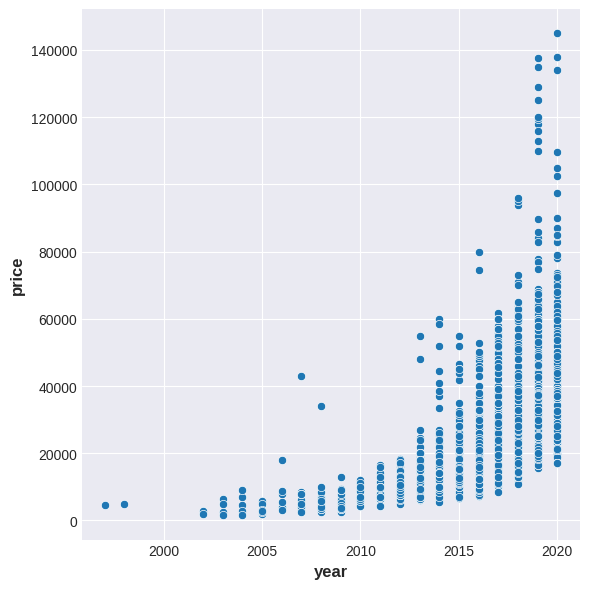

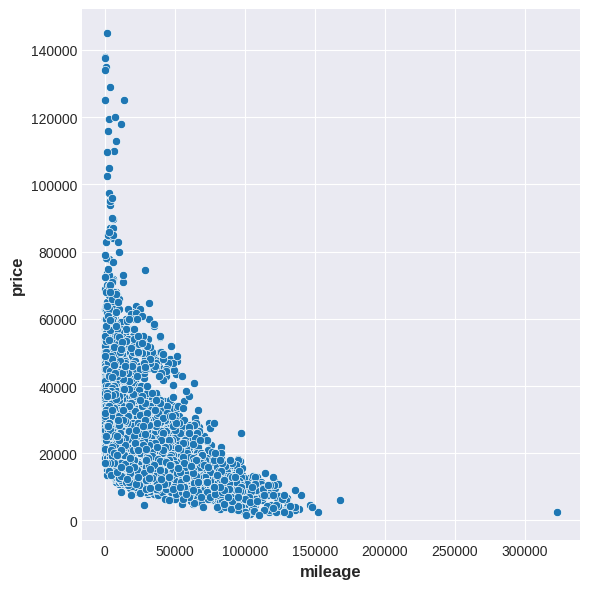

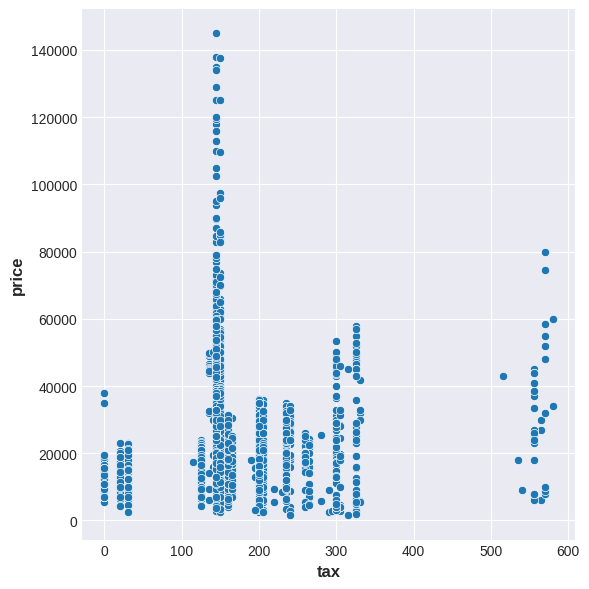

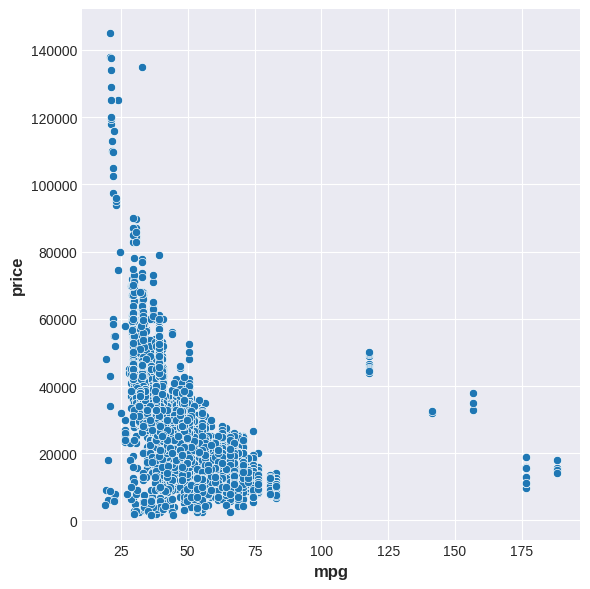

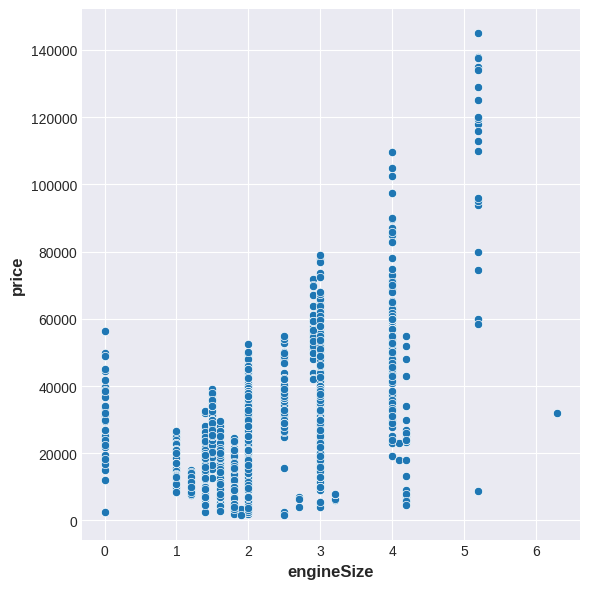

In [4]:
y = audi['price']
audi_ = audi.drop('price', axis=1)

cols = [col for col in audi_.columns if audi_[col].dtype in ['int64','float64']]

for idx, col in enumerate(cols):
    plt.figure(idx, figsize=(6,6))
    sns.scatterplot(x=col, y=y, data=audi_)
    plt.show

In [5]:
features = ['mileage','year','mpg','tax','engineSize']

X = audi_[features]

# normalizing features
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

# principal component analysis on features
pca = PCA()

# fit and transform X_norm to PCA dataframe
X_pca = pca.fit_transform(X_norm)

# converting to dataframe
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pcadf = pd.DataFrame(X_pca, columns=names)


print(X_pcadf.head())
print("+++++++++++++++++++++++++++++++++++++++++++++++++++")
print("shape of pca df:", X_pcadf.shape)

        PC1       PC2       PC3       PC4       PC5
0  0.090760 -0.570609  0.764235  0.477724 -0.189107
1  1.695531 -0.392693 -0.959671 -0.290391 -0.193339
2  1.372958 -0.846314  0.045635 -0.757974 -0.270327
3  0.594204 -0.060592 -0.251248  1.143175  0.014687
4 -0.671744 -1.585431  1.074037  0.237700  0.083554
+++++++++++++++++++++++++++++++++++++++++++++++++++
shape of pca df: (10668, 5)


In [6]:
pca.singular_values_

array([157.07494624, 128.5707558 ,  81.32535378,  58.01448569,
        46.39534781])

In [7]:
cov_matrix = np.cov(X_norm.T)
print("Convariance matrix: ", cov_matrix)

Convariance matrix:  [[ 1.         -0.78966699  0.39510337 -0.16654715  0.07071017]
 [-0.78966699  1.         -0.35128087  0.09306616 -0.0315823 ]
 [ 0.39510337 -0.35128087  1.         -0.63590853 -0.36562073]
 [-0.16654715  0.09306616 -0.63590853  1.          0.39307544]
 [ 0.07071017 -0.0315823  -0.36562073  0.39307544  1.        ]]


In [8]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvectors:", eigenvectors)
print("Eigenvalues:", eigenvalues)

Eigenvectors: [[-0.48575669  0.46716498 -0.0732536  -0.7130325   0.17892982]
 [ 0.46373634 -0.48249022  0.26369364 -0.68624992 -0.10806712]
 [-0.5485194  -0.22908421  0.24802587  0.00616002 -0.76491314]
 [ 0.43356476  0.43702648 -0.49512711 -0.10954391 -0.60322362]
 [ 0.24522869  0.55271001  0.7864044   0.09277865 -0.08564328]]
Eigenvalues: [2.31297823 1.54968025 0.62002561 0.20179322 0.31552269]


In [9]:
# sort the eigen values and eigen vectors in descending order
eig_pairs = [(eigenvalues[index],eigenvectors[:,index]) for index in range(len(eigenvalues))]

# sort the pairs
eig_pairs.sort()

# reverse to make it in correct order
eig_pairs.reverse()
print(eig_pairs)

# extract the sorted eiganvalues and eiganvectors
eigenvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigenvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# print sorted eigan values
print("Sorted eigan values:", eigenvalues_sorted)

[(2.3129782260606886, array([-0.48575669,  0.46373634, -0.5485194 ,  0.43356476,  0.24522869])), (1.5496802518372197, array([ 0.46716498, -0.48249022, -0.22908421,  0.43702648,  0.55271001])), (0.6200256087189561, array([-0.0732536 ,  0.26369364,  0.24802587, -0.49512711,  0.7864044 ])), (0.31552269142829453, array([ 0.17892982, -0.10806712, -0.76491314, -0.60322362, -0.08564328])), (0.20179322195483534, array([-0.7130325 , -0.68624992,  0.00616002, -0.10954391,  0.09277865]))]
Sorted eigan values: [2.3129782260606886, 1.5496802518372197, 0.6200256087189561, 0.31552269142829453, 0.20179322195483534]


In [10]:
# plot the variance plots using sorted eigenvalues and eigenvectors
total = sum(eigenvalues_sorted)
var_explained = [(i/total) for i in eigenvalues_sorted]

# calculate cumulative variance
cum_var_exp = np.cumsum(var_explained)

In [11]:
# transforming original dataframe into PCA
vect = np.array(eigenvectors_sorted)

# dot product to create principal components analysis
X_vect_pca = np.dot(X_norm,vect.T)

pd.DataFrame(X_vect_pca)

,0,1,2,3,4
0,-0.090760,-0.570609,-0.764235,-0.477724,0.189107
1,-1.695531,-0.392693,0.959671,0.290391,0.193339
2,-1.372958,-0.846314,-0.045635,0.757974,0.270327
3,-0.594204,-0.060592,0.251248,-1.143175,-0.014687
4,0.671744,-1.585431,-1.074037,-0.237700,-0.083554
...,...,...,...,...,...
10663,0.843949,-1.767887,-0.958674,-0.272181,-0.461441
10664,0.918381,-1.775900,-0.989172,-0.332613,-0.407711
10665,0.946673,-1.803109,-0.984906,-0.343034,-0.366183
10666,0.373421,-0.578826,-0.885789,-0.088680,0.400585


[0.46259565 0.30993605 0.12400512 0.06310454 0.04035864]


<function matplotlib.pyplot.show(close=None, block=None)>

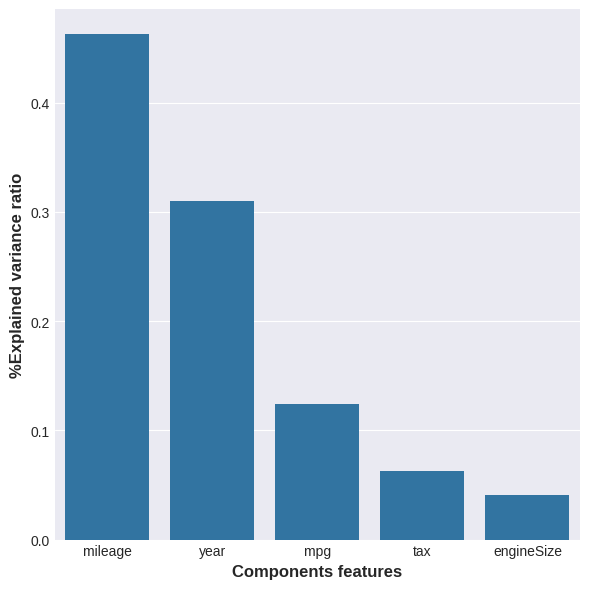

In [12]:
evr = pca.explained_variance_ratio_
print(evr)
features = ['mileage','year','mpg','tax','engineSize']

# plot the EVR using matplotlib pyplot
plt.figure(figsize=(6,6))
sns.barplot(x=np.array(features), y=evr)
plt.xlabel("Components features")
plt.ylabel("%Explained variance ratio")
plt.show

[2.31297823 1.54968025 0.62002561 0.31552269 0.20179322]


<function matplotlib.pyplot.show(close=None, block=None)>

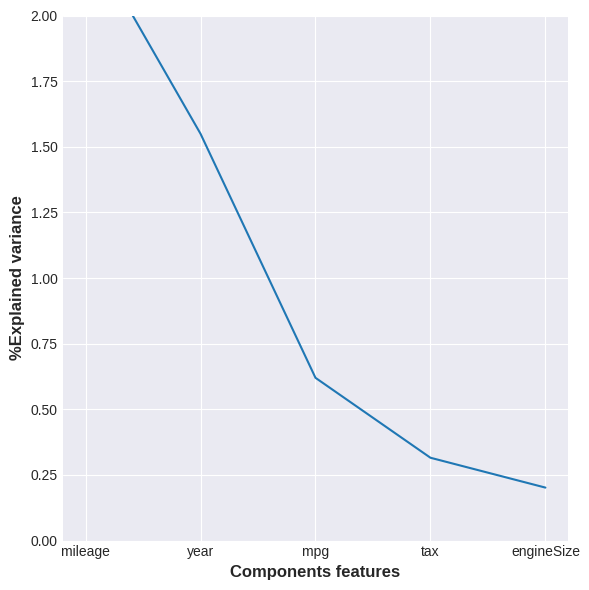

In [13]:
ev = pca.explained_variance_
print(ev)

features = ['mileage','year','mpg','tax','engineSize']


plt.figure(figsize=(6,6))
sns.lineplot(x=np.array(features), y=ev)
plt.xlabel("Components features")
plt.ylabel("%Explained variance")
plt.ylim(0,2)
plt.show

[2.31297823 3.86265848 4.48268409 4.79820678 5.        ]


<function matplotlib.pyplot.show(close=None, block=None)>

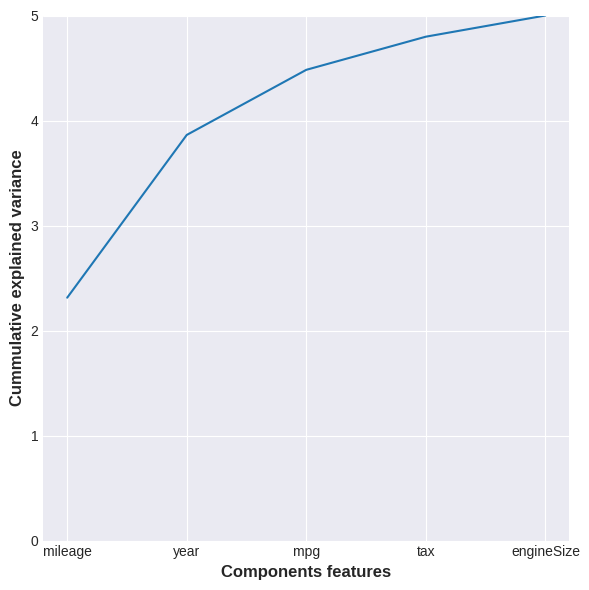

In [14]:
evc = np.cumsum(pca.explained_variance_)
print(evc)

features = ['mileage','year','mpg','tax','engineSize']


plt.figure(figsize=(6,6))
sns.lineplot(x=np.array(features), y=evc)
plt.xlabel("Components features")
plt.ylabel("Cummulative explained variance")
plt.ylim(0,5)
plt.show

In [15]:
loadings = pd.DataFrame(pca.components_.T ,
                        index=np.array(features),
                        columns=names)

loadings

,PC1,PC2,PC3,PC4,PC5
mileage,0.485757,0.467165,0.073254,-0.178930,0.713033
year,-0.463736,-0.482490,-0.263694,0.108067,0.686250
mpg,0.548519,-0.229084,-0.248026,0.764913,-0.006160
tax,-0.433565,0.437026,0.495127,0.603224,0.109544
engineSize,-0.245229,0.552710,-0.786404,0.085643,-0.092779


In [16]:
pca.noise_variance_

0.0

In [17]:
# covariance matrix of principal components
pca.get_covariance()

array([[ 1.        , -0.78966699,  0.39510337, -0.16654715,  0.07071017],
       [-0.78966699,  1.        , -0.35128087,  0.09306616, -0.0315823 ],
       [ 0.39510337, -0.35128087,  1.        , -0.63590853, -0.36562073],
       [-0.16654715,  0.09306616, -0.63590853,  1.        ,  0.39307544],
       [ 0.07071017, -0.0315823 , -0.36562073,  0.39307544,  1.        ]])

In [18]:
y = audi['price']

mi_score = mutual_info_regression(X_pcadf,y, discrete_features=False)
mi_score = pd.Series(mi_score, index=X_pcadf.columns, name="MI_SCORE")

print(mi_score)

PC1    1.004589
PC2    0.315714
PC3    0.556959
PC4    0.310625
PC5    0.209799
Name: MI_SCORE, dtype: float64
